In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [3]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [4]:
LACdf = gdf[gdf.Tm == 'LAC']
PORdf = gdf[gdf.Tm == 'POR']


In [5]:
LACdf.Date = LACdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
LACdf = LACdf[(LACdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (LACdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

PORdf.Date = PORdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
PORdf = PORdf[(PORdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (PORdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


C:\Users\Home\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

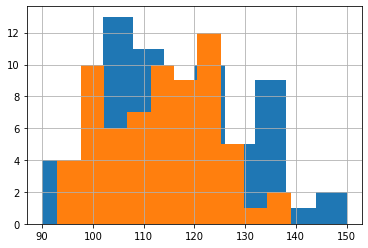

In [6]:
LACdf.TeamPTS.hist()
PORdf.TeamPTS.hist()

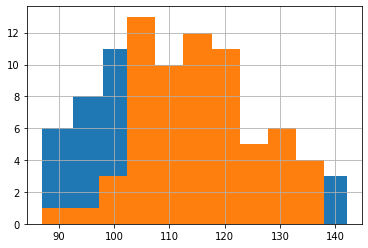

In [7]:
LACdf.OpponentPTS.hist()
PORdf.OpponentPTS.hist()

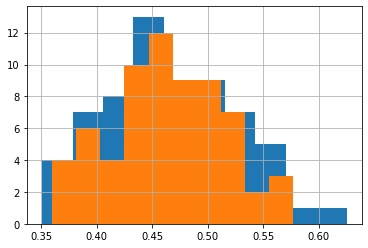

In [8]:
LACdf.TeamFGP.hist()
PORdf.TeamFGP.hist()

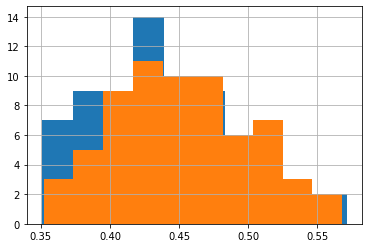

In [9]:
LACdf.OpponentFGP.hist()
PORdf.OpponentFGP.hist()

In [10]:
LACmeanpts = LACdf.TeamPTS.mean()
PORmeanpts = PORdf.TeamPTS.mean()
LACfgp = LACdf.TeamFGP.mean()
PORfgp = PORdf.TeamFGP.mean()
LACsdpts = LACdf.TeamPTS.std()
PORsdpts = PORdf.TeamPTS.std()

LACmeaPORp = LACdf.OpponentPTS.mean()
PORmeaPORp = PORdf.OpponentPTS.mean()
LACfgpopp = LACdf.OpponentFGP.mean()
PORfgpopp = PORdf.OpponentFGP.mean()
LACsdopp = LACdf.OpponentPTS.std()
PORsdopp = PORdf.OpponentPTS.std()

print("LAC Mean ", LACmeanpts)
print("LAC FG% ", LACfgp)
print("LAC Points Standard Deviation ", LACsdpts)
print("POR Points Mean ", PORmeanpts)
print("POR FG% ", PORfgp)
print("POR Points Standard Deviation ", PORsdpts)

print("LAC OppPoints Mean ", LACmeaPORp)
print("LAC OppFG% Mean ", LACfgpopp)
print("LAC OppPoints SD ", LACsdopp)
print("POR OppPoints Mean ", PORmeaPORp)
print("POR OppFG% Mean ", PORfgpopp)
print("POR OppPoints SD ", PORsdopp)

LAC Mean  116.1875
LAC FG%  0.46528125000000015
LAC Points Standard Deviation  14.054175225527867
POR Points Mean  113.63636363636364
POR FG%  0.4623787878787878
POR Points Standard Deviation  10.725435424026616
LAC OppPoints Mean  109.671875
LAC OppFG% Mean  0.4372500000000002
LAC OppPoints SD  13.727570089260354
POR OppPoints Mean  115.24242424242425
POR OppFG% Mean  0.4524242424242424
POR OppPoints SD  10.59035934025428


In [11]:
def gameSim():
    LACScore = (rnd.gauss(LACmeanpts,LACsdpts)+ rnd.gauss(PORmeaPORp,PORsdopp))/2
    PORScore = (rnd.gauss(PORmeanpts,PORsdpts)+ rnd.gauss(PORmeaPORp,PORsdopp))/2
    if int(round(LACScore)) > int(round(PORScore)):
        return 1
    elif int(round(LACScore)) < int(round(PORScore)):
        return -1
    else: return 0

In [12]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('LAC Win ', team1win/(team1win+team2win),'%')
    print('POR Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [13]:
gAmesSim(10000)

LAC Win  0.5454734219269103 %
POR Win  0.4545265780730897 %


[1,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 0,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1